In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

In [ ]:
# Upload a video file
from google.colab import files
uploaded = files.upload()

Saving trainlist01.txt to trainlist01.txt


In [ ]:
# open the .txt file which have names of training videos
f = open("trainlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')
# creating a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]


In [ ]:
# View sample dataset
train.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1


In [ ]:
train['video_name'].iloc[1]

'ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1'

In [ ]:
# Upload a video file
from google.colab import files
uploaded = files.upload()

Saving testlist01.txt to testlist01.txt


In [ ]:
f = open("testlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')
# creating a dataframe having video names
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


In [ ]:
test['video_name'].iloc[1]

'ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi'

In [ ]:
# creating tags for training videos
train_video_tag = []
for i in range(train.shape[0]):
   train_video_tag.append(train['video_name'][i].split('/')[0])  
train['tag'] = train_video_tag
# creating tags for test videos
test_video_tag = []
for i in range(test.shape[0]):
   test_video_tag.append(test['video_name'][i].split('/')[0])  
test['tag'] = test_video_tag

In [ ]:
train.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi 1,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi 1,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi 1,ApplyEyeMakeup


In [ ]:
test.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup


In [ ]:
train.head(2)

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi 1,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi 1,ApplyEyeMakeup


In [ ]:
!mkdir '/content/gdrive/MyDrive/KBS/train/' #create train folder

In [ ]:
# storing the frames from training videos
for i in tqdm(range(train.shape[0])):
   count = 0
   videoFile = train['video_name'][i]
   cap = cv2.VideoCapture('/content/gdrive/MyDrive/KBS/UFC-101/'+videoFile.split(' ')[0])   # capturing the video from the given path
   frameRate = cap.get(6) #frame rate
   x=1
   while(cap.isOpened()):
       frameId = cap.get(1) #current frame number
       ret, frame = cap.read()
       if (ret != True):
           break
       if (frameId % math.floor(frameRate) == 0):
           # storing the frames in a new folder named train_1
           filename ='/content/gdrive/MyDrive/KBS/train/' + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count;count+=1
           cv2.imwrite(filename, frame)
   cap.release()

100%|██████████| 9537/9537 [05:10<00:00, 30.74it/s]  


In [ ]:
images = glob("/content/gdrive/MyDrive/KBS/train/*.jpg")
images[:10]

['/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g08_c01.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g08_c02.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g08_c03.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g08_c04.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g08_c05.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g09_c01.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g09_c02.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g09_c03.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g09_c04.avi_frame0.jpg',
 '/content/gdrive/MyDrive/KBS/train/v_ApplyEyeMakeup_g09_c05.avi_frame0.jpg']

In [ ]:
# getting the names of all the images
images = glob("/content/gdrive/MyDrive/KBS/train/*.jpg")
train_image = []
train_class = []
for i in tqdm(range(len(images))):
   # creating the image name
   train_image.append(images[i].split('/')[-1])
   # creating the class of image
   train_class.append(images[i].split('/')[-1].split('_')[1])  
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class
# converting the dataframe into csv file
train_data.to_csv('/content/gdrive/MyDrive/KBS/train_new.csv',header=True, index=False)


100%|██████████| 680/680 [00:00<00:00, 379524.51it/s]


So far, we have extracted frames from all the training videos and saved them in a .csv file along with their corresponding tags. Now we have to train our model which we will use to predict the tags for videos in the test set.

In [ ]:
train_data.head(2)

,image,class
0,v_ApplyEyeMakeup_g08_c01.avi_frame0.jpg,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi_frame0.jpg,ApplyEyeMakeup


In [ ]:
import keras
from keras.models import Sequential
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/KBS/train_new.csv')
train.head(3)


,image,class
0,v_ApplyEyeMakeup_g08_c01.avi_frame0.jpg,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi_frame0.jpg,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g08_c03.avi_frame0.jpg,ApplyEyeMakeup


We will read the frames (from this .csv file) that we extracted earlier and then store those frames as a NumPy array

In [ ]:
len(train)

680

In [ ]:
# creating an empty list
train_image = []
# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
   # loading the image and keeping the target size as (224,224,3)
   img = image.image_utils.load_img('/content/gdrive/MyDrive/KBS/train/'+train['image'][i], target_size=(224,224,3))
   # converting it to array
   img = image.image_utils.img_to_array(img)
   # normalizing the pixel value
   img = img/255
   # appending the image to the train_image list
   train_image.append(img)  
# converting the list to numpy array
X = np.array(train_image)
# shape of the array
X.shape


100%|██████████| 680/680 [00:02<00:00, 242.82it/s]


(680, 224, 224, 3)

To create the validation set, we need to make sure that the distribution of each class is similar in both training and validation sets. We can use the stratify parameter to do that:

In [ ]:
# separating the target
y = train['class']
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2, stratify = y)

Here, stratify = y (which is the class or tags of each frame) keeps the similar distribution of classes in both the training as well as the validation set.


In [ ]:
# Number of classes available
train_data['class'].nunique()

7

Remember – there are 24, categories in which a video can be classified. So, we will have to create 24 different columns in the target, one for each category. We will use the get_dummies() function for that

In [ ]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

96112376/96112376 [==============================] - 0s 0us/step


In [ ]:
base_model_1 = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# extracting features for training frames
X_train = base_model_1.predict(X_train)
X_train.shape

17/17 [==============================] - 12s 60ms/step


(544, 5, 5, 2048)

In [ ]:
# extracting features for validation frames
X_test = base_model_1.predict(X_test)
X_test.shape

5/5 [==============================] - 2s 272ms/step


(136, 5, 5, 2048)

In [ ]:
# reshaping the training as well as validation frames in single dimension (one dimensional)
X_train = X_train.reshape(544, 5*5*2048)
X_test = X_test.reshape(136, 5*5*2048)

It is always advisable to normalize the pixel values, i.e., keep the pixel values between 0 and 1. This helps the model to converge faster.


In [ ]:
# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_test = X_test/max


Next, we will create the architecture of the model. We have to define the input shape for that. So, let’s check the shape of our images:


In [ ]:
# shape of images
X_train.shape

(544, 51200)

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(51200,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

## **Train the model**

So, let’s define a function to save the weights of the model:


In [ ]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint


In [ ]:
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
# training the model
history = model.fit(
    X_train, y_train, 
    epochs=150, 
    validation_data=(X_test, y_test), 
    callbacks=[mcp_save], 
    batch_size=128)

Epoch 1/150


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 [==============================] - ETA: 0s - loss: 2.2033 - accuracy: 0.1654

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 [==============================] - 4s 876ms/step - loss: 2.2033 - accuracy: 0.1654 - val_loss: 1.8223 - val_accuracy: 0.4632
Epoch 2/150
5/5 [==============================] - 3s 824ms/step - loss: 2.1497 - accuracy: 0.1949 - val_loss: 1.7234 - val_accuracy: 0.6838
Epoch 3/150
5/5 [==============================] - 4s 887ms/step - loss: 1.9102 - accuracy: 0.2353 - val_loss: 1.5616 - val_accuracy: 0.4559
Epoch 4/150
5/5 [==============================] - 4s 881ms/step - loss: 1.7963 - accuracy: 0.3235 - val_loss: 1.4018 - val_accuracy: 0.6176
Epoch 5/150
5/5 [==============================] - 4s 851ms/step - loss: 1.5057 - accuracy: 0.4118 - val_loss: 1.1781 - val_accuracy: 0.8750
Epoch 6/150
5/5 [==============================] - 3s 795ms/step - loss: 1.3674 - accuracy: 0.4614 - val_loss: 0.8965 - val_accuracy: 0.9191
Epoch 7/150
5/5 [==============================] - 4s 874ms/step - loss: 1.1797 - accuracy: 0.5460 - val_loss: 0.7070 - val_accuracy: 0.8382
Epoch 8/150
5/5 [========

In [ ]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:15]


5/5 [==============================] - 0s 8ms/step


[6, 2, 1, 2, 3, 5, 3, 3, 2, 0, 5, 2, 6, 4, 5]

In [ ]:
y_test.columns

In [ ]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17321398854255676
Test accuracy: 0.9779411554336548


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
cvscores = []
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 97.79%
97.79% (+/- 0.00%)


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
tf.data.experimental.enable_debug_mode()

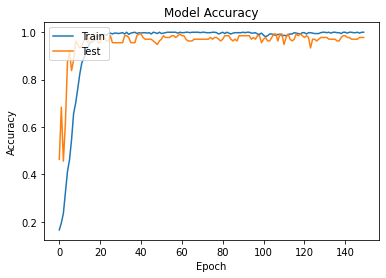

In [ ]:
# plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



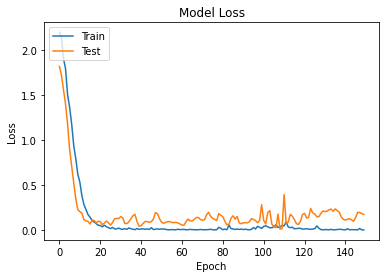

In [ ]:
# plot loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import save_model, load_model
save_model(model, '/content/gdrive/MyDrive/KBS/inceptionv3.h5')

In [ ]:
pip freeze > requirements.txt